In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
import pandas as pd

# Load dataset
heart = pd.read_csv("/content/drive/MyDrive/heart.csv")

# Preview first rows
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [38]:
print("Shape:", heart.shape)
print("\nColumns:")
print(heart.columns.tolist())

print("\nDataset Info:")
heart.info()

print("\nSummary Statistics:")
heart.describe()

Shape: (1025, 14)

Columns:
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB

Summary Statistics:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
# Check how many missing (null) values are present in each column
# This helps us decide if data cleaning is required
heart.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


The Heart Disease dataset does not contain any missing values.
Therefore, no data cleaning or imputation was required.

**Exploratory Data Analysis (EDA)**

In [17]:
# Count the number of samples for each class (0 = No disease, 1 = Disease)
heart['target'].value_counts()

,count
target,
1,526
0,499


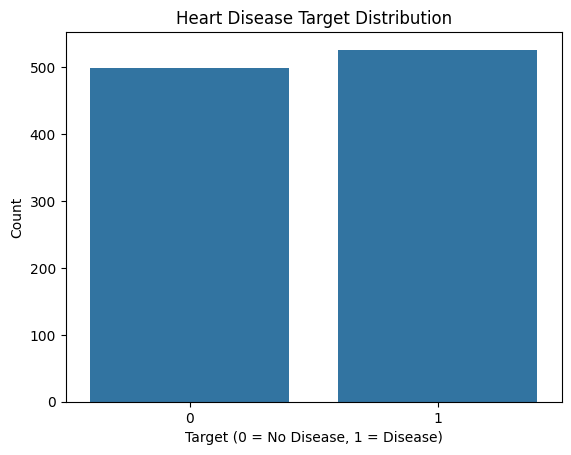

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot count of target classes
sns.countplot(x='target', data=heart)
plt.title("Heart Disease Target Distribution")
plt.xlabel("Target (0 = No Disease, 1 = Disease)")
plt.ylabel("Count")
plt.show()

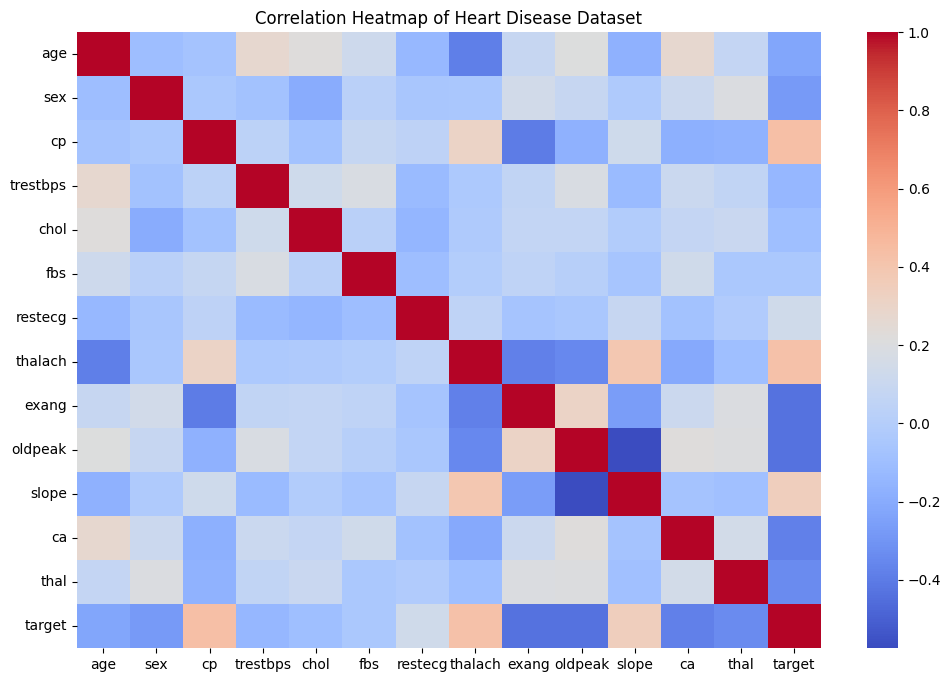

In [19]:
# Compute correlation matrix
corr_matrix = heart.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap of Heart Disease Dataset")
plt.show()

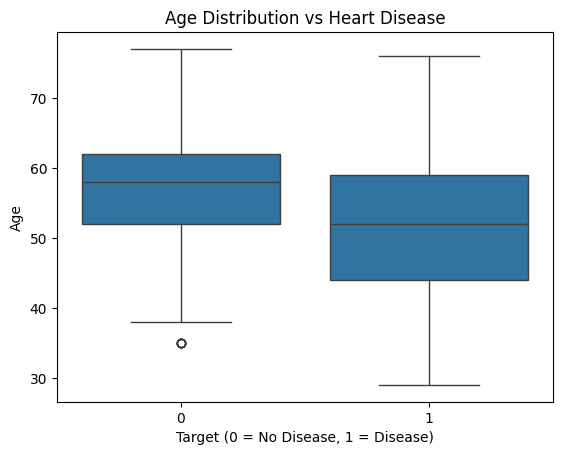

In [20]:
# Visualize age distribution based on heart disease presence
sns.boxplot(x='target', y='age', data=heart)
plt.title("Age Distribution vs Heart Disease")
plt.xlabel("Target (0 = No Disease, 1 = Disease)")
plt.ylabel("Age")
plt.show()

**Model Training (Logistic Regression)**


EDA shows that some features such as age, thalach, and oldpeak
have noticeable relationships with the target variable.
Correlation analysis helps identify features that may influence
heart disease prediction.

In [22]:
# Separate input features (X) and target variable (y)
# X contains all columns except 'target'
# y contains only the target column
X = heart.drop('target', axis=1)
y = heart['target']

In [23]:
from sklearn.model_selection import train_test_split

# Split data into training (80%) and testing (20%)
# random_state ensures reproducibility
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [25]:
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()

# Fit scaler on training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data using the same scaler
X_test_scaled = scaler.transform(X_test)

In [26]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Train the model using training data
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [28]:
# Predict target values for test data
y_pred = model.predict(X_test_scaled)

**Model Evaluation**

In [29]:
#Accuracy Score
from sklearn.metrics import accuracy_score

# Calculate accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print("Model Accuracy:", accuracy)

Model Accuracy: 0.7951219512195122


In [30]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[73 29]
 [13 90]]


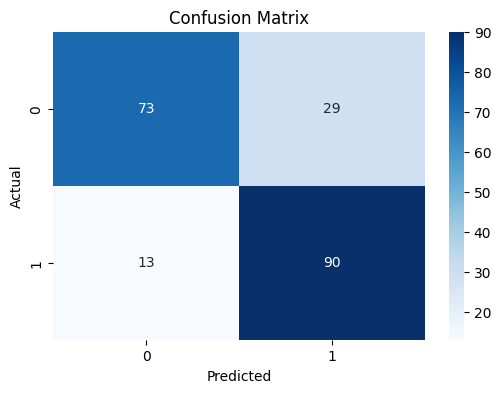

In [31]:
#Confusion Matrix (Visualized)
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [32]:
#ROC Curve & AUC Score
from sklearn.metrics import roc_curve, auc

# Get probability scores for the positive class
y_prob = model.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC
roc_auc = auc(fpr, tpr)

print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.8787359604035789


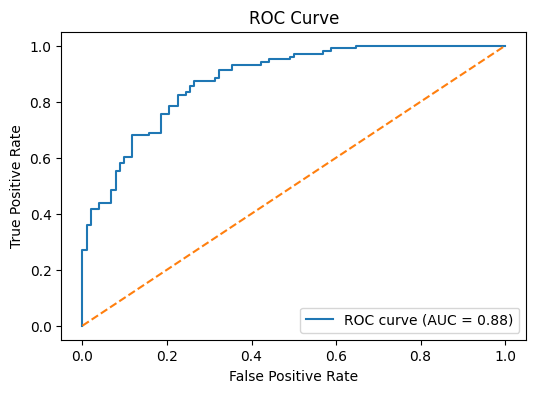

In [33]:
#Plot ROC Curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label="ROC curve (AUC = {:.2f})".format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [34]:
#Feature Importance (Logistic Regression Coefficients)
# Get feature importance from logistic regression coefficients
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

feature_importance

,Feature,Coefficient
2,cp,0.885835
7,thalach,0.652826
10,slope,0.343605
6,restecg,0.140804
0,age,-0.006734
5,fbs,-0.062685
3,trestbps,-0.320053
8,exang,-0.420235
4,chol,-0.447276
12,thal,-0.656856


The Logistic Regression model achieved good performance in predicting
heart disease. Evaluation using accuracy, confusion matrix,and ROC-AUC shows that the model can distinguish between patients with and without heart disease. Feature coefficients indicate which medical attributes
have stronger influence on prediction.
